# Machine Learning Final Project

## Loading Packages and Datasets 

In [ ]:
import pandas as pd 
import numpy as np 
import pandas_profiling
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [ ]:
%load_ext memory_profiler

In [ ]:
train = pd.read_csv("C:/Users/mayaa/Downloads/Project Data/Project Data/ProjectTrainingData.csv")

In [ ]:
%memit

peak memory: 7802.92 MiB, increment: 0.00 MiB


In [ ]:
test = pd.read_csv("C:/Users/mayaa/Downloads/Project Data/Project Data/ProjectTestData.csv")

## Data Quality & Assurance 

In [ ]:
train.shape

(31991090, 24)

In [ ]:
train.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

#### Looking for Cardinality 

In [ ]:
n_records = len(train)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{}({}) | COMMON: {:.2f}%| UNCOMMON:{} observation/s".format(
            df[column].name,
            df[column].dtype,
            100 * most_common / (1.0 * n_records),
            least_common,
        ))

duplicate_values_col(train)

id(float64) | COMMON: 0.00%| UNCOMMON:1 observation/s
click(int64) | COMMON: 83.01%| UNCOMMON:5434977 observation/s
hour(int64) | COMMON: 1.24%| UNCOMMON:13134 observation/s
C1(int64) | COMMON: 91.60%| UNCOMMON:5031 observation/s
banner_pos(int64) | COMMON: 71.43%| UNCOMMON:1675 observation/s
site_id(object) | COMMON: 34.92%| UNCOMMON:1 observation/s
site_domain(object) | COMMON: 36.25%| UNCOMMON:1 observation/s
site_category(object) | COMMON: 39.80%| UNCOMMON:2 observation/s
app_id(object) | COMMON: 65.08%| UNCOMMON:1 observation/s
app_domain(object) | COMMON: 68.74%| UNCOMMON:1 observation/s
app_category(object) | COMMON: 65.96%| UNCOMMON:1 observation/s
device_id(object) | COMMON: 82.27%| UNCOMMON:1 observation/s
device_ip(object) | COMMON: 0.53%| UNCOMMON:1 observation/s
device_model(object) | COMMON: 6.12%| UNCOMMON:1 observation/s
device_type(int64) | COMMON: 92.02%| UNCOMMON:29 observation/s
device_conn_type(int64) | COMMON: 86.53%| UNCOMMON:35604 observation/s
C14(int64) | COMM

#### Looking for Outliers 

In [ ]:
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(train)

id | 0 | float64
click | 0 | int64
hour | 0 | int64
C1 | 855982 | int64
banner_pos | 58572 | int64
device_type | 756708 | int64
device_conn_type | 1818729 | int64
C14 | 657399 | int64
C15 | 323493 | int64
C16 | 1521856 | int64
C17 | 657661 | int64
C18 | 0 | int64
C19 | 1490678 | int64
C20 | 0 | int64
C21 | 0 | int64


#### Looking for Missing Values 

In [ ]:
n_records = len(train)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(train)

#there are no missing values in the dataset 

id | 0.0 | float64
click | 0.0 | int64
hour | 0.0 | int64
C1 | 0.0 | int64
banner_pos | 0.0 | int64
site_id | 0.0 | object
site_domain | 0.0 | object
site_category | 0.0 | object
app_id | 0.0 | object
app_domain | 0.0 | object
app_category | 0.0 | object
device_id | 0.0 | object
device_ip | 0.0 | object
device_model | 0.0 | object
device_type | 0.0 | int64
device_conn_type | 0.0 | int64
C14 | 0.0 | int64
C15 | 0.0 | int64
C16 | 0.0 | int64
C17 | 0.0 | int64
C18 | 0.0 | int64
C19 | 0.0 | int64
C20 | 0.0 | int64
C21 | 0.0 | int64


In [ ]:
#checking class balance
train['click'].value_counts()
#The target variable classes is pretty inbalanced 

0    26556113
1     5434977
Name: click, dtype: int64

## Exploratory Data Analysis 

In [ ]:
#in percentage 
train['click'].value_counts()/len(train)

0    0.83011
1    0.16989
Name: click, dtype: float64

In [ ]:
corrmatrix = train.corr()
corrmatrix 

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
id,1.000000,-0.000299,0.000407,0.000162,0.000439,0.000217,0.000284,-0.000326,-0.000034,0.000284,-0.000201,-0.000064,-0.000036,-0.000007,-0.000118
click,-0.000299,1.000000,-0.038194,0.024094,-0.038821,-0.083933,-0.062358,-0.031589,0.130192,-0.058197,0.023471,0.000777,-0.057574,-0.067734,-0.004805
C1,0.000407,-0.038194,1.000000,0.292584,0.896394,0.201854,0.058609,0.124033,0.062705,0.067945,-0.047590,0.013227,-0.034428,0.043508,0.009126
banner_pos,0.000162,0.024094,0.292584,1.000000,0.326333,-0.080498,0.009398,0.061801,0.023562,-0.011428,0.090469,0.149437,0.052401,-0.063491,0.002216
device_type,0.000439,-0.038821,0.896394,0.326333,1.000000,0.215046,0.047998,0.183341,0.064313,0.054672,-0.051558,0.005381,-0.049057,0.044055,0.014079
device_conn_type,0.000217,-0.083933,0.201854,-0.080498,0.215046,1.000000,0.056484,0.069284,-0.014147,0.070598,-0.057592,-0.016517,0.089935,0.024582,0.039568
C14,0.000284,-0.062358,0.058609,0.009398,0.047998,0.056484,1.000000,-0.000559,0.048615,0.975482,-0.235591,-0.164140,0.036815,0.402154,-0.048940
C15,-0.000326,-0.031589,0.124033,0.061801,0.183341,0.069284,-0.000559,1.000000,-0.070665,-0.001931,0.017808,0.050582,0.008488,-0.008584,-0.005430
C16,-0.000034,0.130192,0.062705,0.023562,0.064313,-0.014147,0.048615,-0.070665,1.000000,0.059130,0.080370,-0.071743,-0.047554,-0.074205,0.007546
C17,0.000284,-0.058197,0.067945,-0.011428,0.054672,0.070598,0.975482,-0.001931,0.059130,1.000000,-0.251217,-0.159617,0.020716,0.417794,-0.046242


<AxesSubplot:>

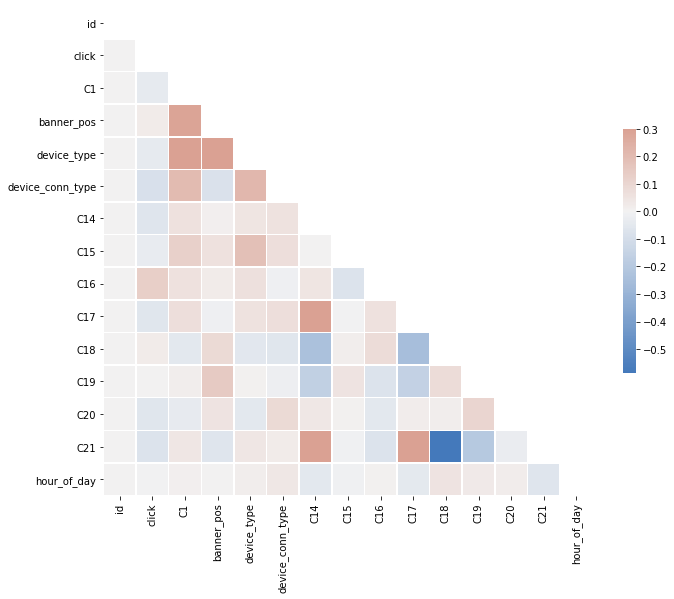

In [ ]:
mask = np.triu(np.ones_like(corrmatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250 ,-700, as_cmap=True)
sns.heatmap(corrmatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#SOURCE: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [ ]:
train.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15706,320,50,1722,0,35,-1,79,0,Tuesday
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15706,320,50,1722,0,35,100084,79,0,Tuesday
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,18993,320,50,2161,0,35,-1,157,0,Tuesday


<AxesSubplot:xlabel='C17', ylabel='C14'>

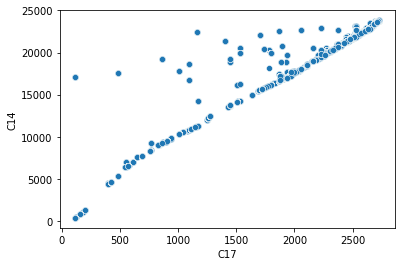

In [ ]:
sns.scatterplot(data=train, x="C17", y="C14")

<AxesSubplot:xlabel='C18', ylabel='C21'>

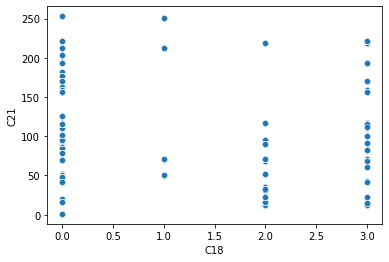

In [ ]:
sns.scatterplot(data=training, x="C18", y="C21") 

<AxesSubplot:xlabel='C16', ylabel='C15'>

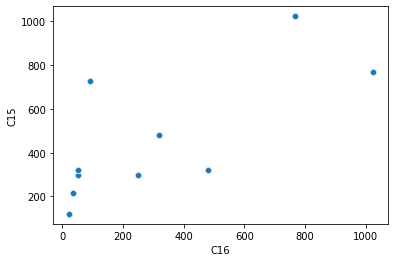

In [ ]:
sns.scatterplot(data=training, x="C16", y="C15") 

<AxesSubplot:xlabel='C1', ylabel='Count'>

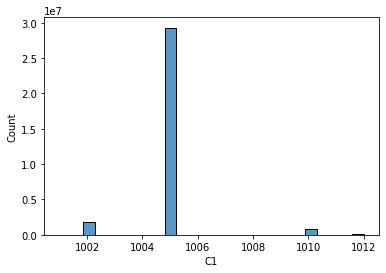

In [ ]:
sns.histplot(data=training, x="C1")

In [ ]:
#Creating CTR by different variables 
#Day of the week CTR 
click = train[train['click'] == 1]

In [ ]:
ctr_dow = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
ctr_dow = ctr_dow.rename(columns={'click': 'impressions'})
ctr_dow['clicks'] = click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
ctr_dow['CTR_DOW'] = ctr_dow['clicks']/ctr_dow['impressions']*100

In [ ]:
hod = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
hod = hod.rename(columns={'click': 'impressions'})
hod['clicks'] = click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
hod['CTR_HOD'] = hod['clicks']/hod['impressions']*100

#train["CTR_HOD"] = hod['CTR_HOD']

In [ ]:
ban = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
ban = ban.rename(columns={'click': 'impressions'})
ban['clicks'] = click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
ban['CTR_BANPOS'] = ban['clicks']/ban['impressions']*100

#train["CTR_BANPOS"] = ban['CTR_BANPOS']

In [ ]:
palette = sns.color_palette("Paired")
sns.set_palette("Paired")

<AxesSubplot:xlabel='banner_pos', ylabel='CTR_BANPOS'>

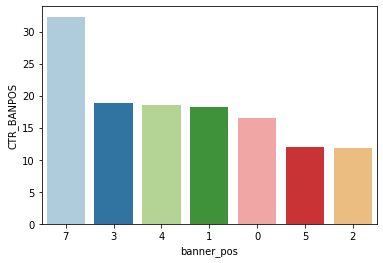

In [ ]:
sns.barplot(y='CTR_BANPOS', x='banner_pos', data=ban, order=ban.sort_values('CTR_BANPOS',ascending = False).banner_pos)

<AxesSubplot:xlabel='day_of_week', ylabel='CTR_DOW'>

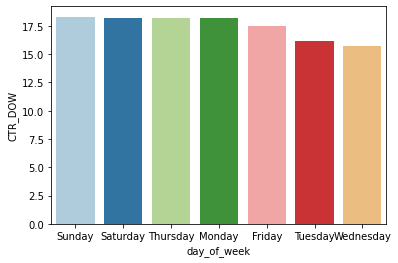

In [ ]:
sns.barplot(y='CTR_DOW', x='day_of_week', data=ctr_dow, order=ctr_dow.sort_values('CTR_DOW',ascending = False).day_of_week)

<AxesSubplot:xlabel='hour_of_day', ylabel='CTR_HOD'>

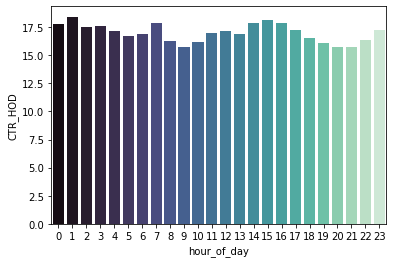

In [ ]:
sns.set_palette('rocket_r', 8, .75)
sns.barplot(y='CTR_HOD', x='hour_of_day', data=hod, palette = "mako")

## Feature Engineering

In [ ]:
#making hour a date time 
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')
train['hour_of_day'] = train['hour'].dt.hour

In [ ]:
#creating day of the week
train['day_of_week'] = train['hour'].apply(lambda val: val.day_name())

In [ ]:
#combining device id, device ip, and device model to get another identifier for devices/users
cols = ['device_id', 'device_ip', 'device_model']
train['user'] = train[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
#https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-dataframe

In [ ]:
#combining site_id, site_domain, and site_category to get another identifier for sites
cols2 = ['site_id', 'site_domain', 'site_category']
train['site_info'] = train[cols2].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [ ]:
#combining app_id, app_domain, and app_category to get another identifier for sites
cols3 = ['app_id', 'app_domain', 'app_category']
train['app_info'] = train[cols3].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [ ]:
train.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,hour_of_day,day_of_week,user,site_info,app_info
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,-1,79,0,Tuesday,a99f214addd2926e44956a24,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,100084,79,0,Tuesday,a99f214a96809ac8711ee120,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,100084,79,0,Tuesday,a99f214ab3cf8def8a4875bd,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,100084,79,0,Tuesday,a99f214ae8275b8f6332421a,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,2161,0,35,-1,157,0,Tuesday,a99f214a9644d0bf779d90c2,fe8cc4489166c1610569f928,ecad23867801e8d907d7df22


In [ ]:
training = train

In [ ]:
%memit

peak memory: 16101.12 MiB, increment: 0.75 MiB


In [ ]:
training = training.drop(columns=['id'])

In [ ]:
training = training.drop(columns=['hour'])

In [ ]:
trainingsample = training.sample(n=1000000, axis = 0, random_state = 42)

In [ ]:
trainingsample.to_csv('C:/Users/mayaa/Downloads/Project Data/Project Data/trainingsample.csv', index = None)

In [ ]:
samp2 = training.sample(n=1000000, axis = 0)

In [ ]:
samp2.dtypes

click                int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
hour_of_day          int64
day_of_week         object
user                object
site_info           object
app_info            object
dtype: object

#### Adding count features for categorical variables 

In [ ]:
list_of_features = ['device_id', 'site_id', "user", "site_info", "app_info", "app_id", "day_of_week"] 
for feature in list_of_features:
  samp2[feature + '_count'] = samp2.groupby(
    feature)['click'].transform("count")

In [ ]:
samp2.head(10)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C1_mean,C14_mean,C15_mean,C16_mean,C17_mean,C18_mean,C19_mean,C20_mean,C21_mean,day_of_week_count
10111299,0,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,106989
14952693,0,1005,1,ce3307ec,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,93031
25800502,0,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,259459
14856093,0,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,93031
13047972,0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,92105
27962406,0,1005,0,85f751fd,c4e18dd6,50e219e0,73206397,2347f47a,8ded1f7a,0d22425c,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,259459
6469152,0,1005,0,85f751fd,c4e18dd6,50e219e0,1a32e234,2347f47a,0f2161f8,b1007a59,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,252967
25479491,0,1005,0,85f751fd,c4e18dd6,50e219e0,f53417e1,0e8616ad,0f2161f8,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,259459
21072962,0,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,106301
1055984,0,1005,0,85f751fd,c4e18dd6,50e219e0,1cc958a2,2347f47a,f95efa07,a99f214a,...,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,0.169777,259459


In [ ]:
# Converting c1-c21 to categorical 
samp2['C1'] = samp2.C1.astype('category')
samp2['C14'] = samp2.C1.astype('category')
samp2['C15'] = samp2.C1.astype('category')
samp2['C16'] = samp2.C1.astype('category')
samp2['C17'] = samp2.C1.astype('category')
samp2['C18'] = samp2.C1.astype('category')
samp2['C19'] = samp2.C1.astype('category')
samp2['C20'] = samp2.C1.astype('category')
samp2['C21'] = samp2.C1.astype('category')

In [ ]:
#f_n = ['C1', 'C14', "C15", "C16", "C17", "C18", "C19", "C20", "C21"] 
#for fn in f_n:
#  samp2[fn + '_mean'] = samp2.groupby(
#    fn)['click'].transform("mean")

In [ ]:
samp2 = samp2.drop(columns=['C1_count', 'C14_count', "C15_count", "C16_count", "C17_count", "C18_count", "C19_count", "C20_count", "C21_count", 'C1_mean', 'C14_mean', "C15_mean", "C16_mean", "C17_mean", "C18_mean", "C19_mean", "C20_mean", "C21_mean"])

In [ ]:
samp2.dtypes

click                   int64
C1                   category
banner_pos              int64
site_id                object
site_domain            object
site_category          object
app_id                 object
app_domain             object
app_category           object
device_id              object
device_ip              object
device_model           object
device_type             int64
device_conn_type        int64
C14                  category
C15                  category
C16                  category
C17                  category
C18                  category
C19                  category
C20                  category
C21                  category
hour_of_day             int64
day_of_week            object
user                   object
site_info              object
app_info               object
device_id_count         int64
site_id_count           int64
user_count              int64
site_info_count         int64
app_info_count          int64
app_id_count            int64
day_of_wee

### Using the Hash Function

In order to circumvent the situation of using label encoder, we decided to use the has function to turn all our variables into integers to avoid memory usage. 

In [ ]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
traininghashed = convert_obj_to_int(trainingsample)

In [ ]:
traininghashed.dtypes

click                int64
C1                   int64
banner_pos           int64
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
hour_of_day          int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_id_int        int64
device_ip_int        int64
device_model_int     int64
day_of_week_int      int64
user_int             int64
site_info_int        int64
app_info_int         int64
dtype: object

## XGBoost Model 

In [ ]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

## Model 1 (using training sample: with user, site info, and app info; will be called TS)

In [ ]:
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int']

In [ ]:
X = traininghashed.loc[:, features]
y = traininghashed.click.values

In [ ]:
# Imports
from sklearn.model_selection import train_test_split

# Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eta": 0.1,
        "max_depth": 5,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42,
        "eval_metric": "logloss",
        }
num_boost_round = 2000
early_stopping_rounds = 20
test_size = 0.2
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

In [ ]:
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

[0]	train-logloss:0.64817	eval-logloss:0.64837
[1]	train-logloss:0.61191	eval-logloss:0.61174
[2]	train-logloss:0.58171	eval-logloss:0.58164
[3]	train-logloss:0.55671	eval-logloss:0.55661
[4]	train-logloss:0.53585	eval-logloss:0.53578
[5]	train-logloss:0.51817	eval-logloss:0.51806
[6]	train-logloss:0.50305	eval-logloss:0.50294
[7]	train-logloss:0.49034	eval-logloss:0.49021
[8]	train-logloss:0.47966	eval-logloss:0.47952
[9]	train-logloss:0.47061	eval-logloss:0.47045
[10]	train-logloss:0.46287	eval-logloss:0.46273
[11]	train-logloss:0.45612	eval-logloss:0.45602
[12]	train-logloss:0.45032	eval-logloss:0.45023
[13]	train-logloss:0.44562	eval-logloss:0.44554
[14]	train-logloss:0.44132	eval-logloss:0.44125
[15]	train-logloss:0.43776	eval-logloss:0.43770
[16]	train-logloss:0.43476	eval-logloss:0.43471
[17]	train-logloss:0.43216	eval-logloss:0.43211
[18]	train-logloss:0.42997	eval-logloss:0.42994
[19]	train-logloss:0.42814	eval-logloss:0.42809
[20]	train-logloss:0.42645	eval-logloss:0.42644
[2

[170]	train-logloss:0.40080	eval-logloss:0.40329
[171]	train-logloss:0.40078	eval-logloss:0.40328
[172]	train-logloss:0.40073	eval-logloss:0.40325
[173]	train-logloss:0.40070	eval-logloss:0.40323
[174]	train-logloss:0.40064	eval-logloss:0.40318
[175]	train-logloss:0.40061	eval-logloss:0.40316
[176]	train-logloss:0.40057	eval-logloss:0.40313
[177]	train-logloss:0.40050	eval-logloss:0.40310
[178]	train-logloss:0.40047	eval-logloss:0.40308
[179]	train-logloss:0.40045	eval-logloss:0.40307
[180]	train-logloss:0.40041	eval-logloss:0.40305
[181]	train-logloss:0.40038	eval-logloss:0.40302
[182]	train-logloss:0.40036	eval-logloss:0.40302
[183]	train-logloss:0.40035	eval-logloss:0.40301
[184]	train-logloss:0.40030	eval-logloss:0.40297
[185]	train-logloss:0.40026	eval-logloss:0.40293
[186]	train-logloss:0.40020	eval-logloss:0.40289
[187]	train-logloss:0.40018	eval-logloss:0.40288
[188]	train-logloss:0.40014	eval-logloss:0.40285
[189]	train-logloss:0.40008	eval-logloss:0.40281
[190]	train-logloss:

[338]	train-logloss:0.39576	eval-logloss:0.40071
[339]	train-logloss:0.39573	eval-logloss:0.40070
[340]	train-logloss:0.39571	eval-logloss:0.40069
[341]	train-logloss:0.39569	eval-logloss:0.40068
[342]	train-logloss:0.39565	eval-logloss:0.40065
[343]	train-logloss:0.39563	eval-logloss:0.40065
[344]	train-logloss:0.39561	eval-logloss:0.40065
[345]	train-logloss:0.39560	eval-logloss:0.40065
[346]	train-logloss:0.39557	eval-logloss:0.40064
[347]	train-logloss:0.39554	eval-logloss:0.40063
[348]	train-logloss:0.39552	eval-logloss:0.40062
[349]	train-logloss:0.39549	eval-logloss:0.40061
[350]	train-logloss:0.39546	eval-logloss:0.40060
[351]	train-logloss:0.39542	eval-logloss:0.40058
[352]	train-logloss:0.39540	eval-logloss:0.40057
[353]	train-logloss:0.39537	eval-logloss:0.40056
[354]	train-logloss:0.39534	eval-logloss:0.40054
[355]	train-logloss:0.39533	eval-logloss:0.40054
[356]	train-logloss:0.39529	eval-logloss:0.40052
[357]	train-logloss:0.39528	eval-logloss:0.40052
[358]	train-logloss:

[506]	train-logloss:0.39209	eval-logloss:0.39934
[507]	train-logloss:0.39208	eval-logloss:0.39935
[508]	train-logloss:0.39205	eval-logloss:0.39933
[509]	train-logloss:0.39204	eval-logloss:0.39934
[510]	train-logloss:0.39200	eval-logloss:0.39931
[511]	train-logloss:0.39199	eval-logloss:0.39932
[512]	train-logloss:0.39196	eval-logloss:0.39931
[513]	train-logloss:0.39193	eval-logloss:0.39930
[514]	train-logloss:0.39192	eval-logloss:0.39929
[515]	train-logloss:0.39190	eval-logloss:0.39929
[516]	train-logloss:0.39187	eval-logloss:0.39928
[517]	train-logloss:0.39187	eval-logloss:0.39928
[518]	train-logloss:0.39186	eval-logloss:0.39928
[519]	train-logloss:0.39184	eval-logloss:0.39928
[520]	train-logloss:0.39184	eval-logloss:0.39928
[521]	train-logloss:0.39183	eval-logloss:0.39928
[522]	train-logloss:0.39180	eval-logloss:0.39928
[523]	train-logloss:0.39178	eval-logloss:0.39927
[524]	train-logloss:0.39177	eval-logloss:0.39926
[525]	train-logloss:0.39175	eval-logloss:0.39925
[526]	train-logloss:

[674]	train-logloss:0.38933	eval-logloss:0.39872
[675]	train-logloss:0.38932	eval-logloss:0.39872
[676]	train-logloss:0.38931	eval-logloss:0.39872
[677]	train-logloss:0.38930	eval-logloss:0.39872
[678]	train-logloss:0.38928	eval-logloss:0.39872
[679]	train-logloss:0.38926	eval-logloss:0.39872
[680]	train-logloss:0.38924	eval-logloss:0.39871
[681]	train-logloss:0.38923	eval-logloss:0.39871
[682]	train-logloss:0.38921	eval-logloss:0.39871
[683]	train-logloss:0.38918	eval-logloss:0.39871
[684]	train-logloss:0.38916	eval-logloss:0.39871
[685]	train-logloss:0.38914	eval-logloss:0.39870
[686]	train-logloss:0.38912	eval-logloss:0.39870
[687]	train-logloss:0.38910	eval-logloss:0.39869
[688]	train-logloss:0.38909	eval-logloss:0.39869
[689]	train-logloss:0.38907	eval-logloss:0.39869
[690]	train-logloss:0.38905	eval-logloss:0.39869
[691]	train-logloss:0.38904	eval-logloss:0.39868
[692]	train-logloss:0.38903	eval-logloss:0.39869
[693]	train-logloss:0.38902	eval-logloss:0.39868
[694]	train-logloss:

[842]	train-logloss:0.38680	eval-logloss:0.39838
[843]	train-logloss:0.38678	eval-logloss:0.39839
[844]	train-logloss:0.38677	eval-logloss:0.39838
[845]	train-logloss:0.38676	eval-logloss:0.39838
[846]	train-logloss:0.38674	eval-logloss:0.39838
[847]	train-logloss:0.38673	eval-logloss:0.39838
[848]	train-logloss:0.38672	eval-logloss:0.39838
[849]	train-logloss:0.38670	eval-logloss:0.39837
[850]	train-logloss:0.38669	eval-logloss:0.39836
[851]	train-logloss:0.38667	eval-logloss:0.39836
[852]	train-logloss:0.38666	eval-logloss:0.39836
[853]	train-logloss:0.38665	eval-logloss:0.39836
[854]	train-logloss:0.38664	eval-logloss:0.39836
[855]	train-logloss:0.38662	eval-logloss:0.39835
[856]	train-logloss:0.38660	eval-logloss:0.39834
[857]	train-logloss:0.38659	eval-logloss:0.39832
[858]	train-logloss:0.38657	eval-logloss:0.39832
[859]	train-logloss:0.38655	eval-logloss:0.39832
[860]	train-logloss:0.38654	eval-logloss:0.39832
[861]	train-logloss:0.38652	eval-logloss:0.39832
[862]	train-logloss:

[1010]	train-logloss:0.38438	eval-logloss:0.39805
[1011]	train-logloss:0.38436	eval-logloss:0.39806
[1012]	train-logloss:0.38434	eval-logloss:0.39806
[1013]	train-logloss:0.38433	eval-logloss:0.39805
[1014]	train-logloss:0.38432	eval-logloss:0.39805
[1015]	train-logloss:0.38431	eval-logloss:0.39805
[1016]	train-logloss:0.38429	eval-logloss:0.39804
[1017]	train-logloss:0.38428	eval-logloss:0.39804
[1018]	train-logloss:0.38427	eval-logloss:0.39804
[1019]	train-logloss:0.38425	eval-logloss:0.39804
[1020]	train-logloss:0.38424	eval-logloss:0.39804
[1021]	train-logloss:0.38423	eval-logloss:0.39804
[1022]	train-logloss:0.38422	eval-logloss:0.39805
[1023]	train-logloss:0.38420	eval-logloss:0.39805
[1024]	train-logloss:0.38418	eval-logloss:0.39804
[1025]	train-logloss:0.38416	eval-logloss:0.39805
[1026]	train-logloss:0.38416	eval-logloss:0.39804
[1027]	train-logloss:0.38414	eval-logloss:0.39804
[1028]	train-logloss:0.38413	eval-logloss:0.39804
[1029]	train-logloss:0.38413	eval-logloss:0.39804


In [ ]:
predictions = model.predict(dtest)

In [ ]:
print(predictions)

[0.11793159 0.23939195 0.14484915 ... 0.27077997 0.18967961 0.05632802]


In [ ]:
# AUC
roc_auc_score(y_test, predictions)

0.7467865390915502

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(y_test, predictions)

0.39802524068494094

## Model Method 2 (using the same sample, TS) 

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:
from sklearn.model_selection import cross_validate

def evaluate_model(estimator):
    return cross_validate(estimator,                     
                    X=X,
                    y=y,
                    scoring="neg_log_loss",
                    n_jobs=-1, cv=3,
                    return_train_score=True)

def display_results(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df

In [ ]:
RESULTS = {}

In [ ]:
def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X=X,
                    y=y,
                    scoring="neg_log_loss",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [ ]:
import xgboost as xgboost

In [ ]:

from xgboost import XGBRegressor, XGBClassifier

In [ ]:
estimator_xgboost = XGBClassifier(n_estimators=500)

RESULTS["xgboost_500"] = evaluate_model(estimator_xgboost)

display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273


In [ ]:
estimator_xgboost2 = XGBClassifier(n_estimators=1000)

RESULTS["xgboost_1000"] = evaluate_model(estimator_xgboost2)

display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273
xgboost_1000,473.557321,2.290347,0.404574,0.338092


### Plotting the feature importance 

In [ ]:
from xgboost import plot_importance
estimator_xgboost.fit(X, y);

[00:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


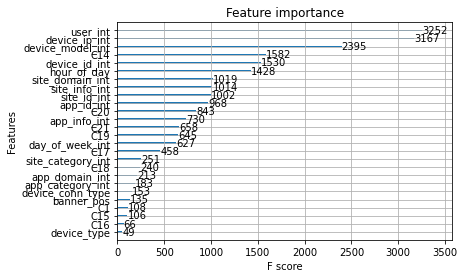

In [ ]:
plot_importance(estimator_xgboost);

### Running this for the entire Training data with user, site info, and app info) 

In [ ]:
f = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int']

In [ ]:
f = traininghashed.loc[:, f]
target = traininghashed.click.values

In [ ]:
def evaluate_model2(estimator):
    return cross_validate(estimator,                     
                    X=f,
                    y=target,
                    scoring="neg_log_loss",
                    n_jobs=-1, cv=5,
                    return_train_score=True)

def display_results2(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df

RESULTS2 = {}

def evaluate_model2(estimator):
    cv_results = cross_validate(estimator,
                    X=f,
                    y=target,
                    scoring="neg_log_loss",
                          n_jobs=-1, cv=10,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [ ]:
estimator_xgboost3 = XGBClassifier(n_estimators=1000)

RESULTS2["full_training"] = evaluate_model2(estimator_xgboost3)

display_results(RESULTS2)

,fit_time,score_time,test_score,train_score
full_training,1004.647778,1.458566,0.402571,0.344972


In [ ]:
estimator_xgboost3.fit(X, y);
plot_importance(estimator_xgboost3);

# Model 2, cube root of skewed C variables 

In [ ]:
trainingsample2 = training.sample(n=1000000, axis = 0)

In [ ]:
print(list(trainingsample2))

['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day', 'day_of_week', 'user', 'site_info', 'app_info']


In [ ]:
training2hashed = convert_obj_to_int(trainingsample2)

In [ ]:
print(list(training2hashed))

['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day', 'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int', 'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int', 'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int']


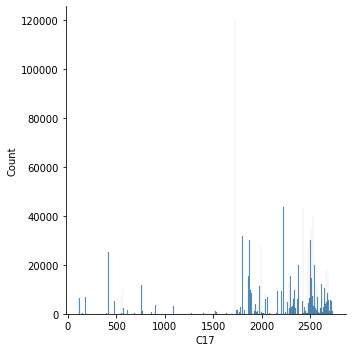

In [ ]:
sns.displot(training2hashed, x="C17", binwidth = 6)

In [ ]:
training2hashed['C17'] = training2hashed['C17']**(1/3)

In [ ]:
training2hashed['C15'] = training2hashed['C15']**(1/3)

In [ ]:
features2 = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int']

In [ ]:
X2 = traininghashed.loc[:, features2]
y2 = traininghashed.click.values

In [ ]:
# Split Validation
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1, stratify=y)

In [ ]:
dtrain2 = xgb.DMatrix(X_train2, label=y_train2)
dtest2 = xgb.DMatrix(X_test2, label=y_test2)

In [ ]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eta": 0.1,
        "max_depth": 5,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42,
        "eval_metric": "logloss",
        }
num_boost_round = 1000
early_stopping_rounds = 20
test_size = 0.2
watchlist = [(dtrain2, 'train'), (dtest2, 'eval')]

In [ ]:
model2 = xgb.train(params, dtrain2, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

[0]	train-logloss:0.64817	eval-logloss:0.64837
[1]	train-logloss:0.61191	eval-logloss:0.61174
[2]	train-logloss:0.58171	eval-logloss:0.58164
[3]	train-logloss:0.55671	eval-logloss:0.55661
[4]	train-logloss:0.53585	eval-logloss:0.53578
[5]	train-logloss:0.51817	eval-logloss:0.51806
[6]	train-logloss:0.50305	eval-logloss:0.50294
[7]	train-logloss:0.49034	eval-logloss:0.49021
[8]	train-logloss:0.47966	eval-logloss:0.47952
[9]	train-logloss:0.47061	eval-logloss:0.47045
[10]	train-logloss:0.46287	eval-logloss:0.46273
[11]	train-logloss:0.45612	eval-logloss:0.45602
[12]	train-logloss:0.45032	eval-logloss:0.45023
[13]	train-logloss:0.44562	eval-logloss:0.44554
[14]	train-logloss:0.44132	eval-logloss:0.44125
[15]	train-logloss:0.43776	eval-logloss:0.43770
[16]	train-logloss:0.43476	eval-logloss:0.43471
[17]	train-logloss:0.43216	eval-logloss:0.43211
[18]	train-logloss:0.42997	eval-logloss:0.42994
[19]	train-logloss:0.42814	eval-logloss:0.42809
[20]	train-logloss:0.42645	eval-logloss:0.42644
[2

[170]	train-logloss:0.40080	eval-logloss:0.40329
[171]	train-logloss:0.40078	eval-logloss:0.40328
[172]	train-logloss:0.40073	eval-logloss:0.40325
[173]	train-logloss:0.40070	eval-logloss:0.40323
[174]	train-logloss:0.40064	eval-logloss:0.40318
[175]	train-logloss:0.40061	eval-logloss:0.40316
[176]	train-logloss:0.40057	eval-logloss:0.40313
[177]	train-logloss:0.40050	eval-logloss:0.40310
[178]	train-logloss:0.40047	eval-logloss:0.40308
[179]	train-logloss:0.40045	eval-logloss:0.40307
[180]	train-logloss:0.40041	eval-logloss:0.40305
[181]	train-logloss:0.40038	eval-logloss:0.40302
[182]	train-logloss:0.40036	eval-logloss:0.40302
[183]	train-logloss:0.40035	eval-logloss:0.40301
[184]	train-logloss:0.40030	eval-logloss:0.40297
[185]	train-logloss:0.40026	eval-logloss:0.40293
[186]	train-logloss:0.40020	eval-logloss:0.40289
[187]	train-logloss:0.40018	eval-logloss:0.40288
[188]	train-logloss:0.40014	eval-logloss:0.40285
[189]	train-logloss:0.40008	eval-logloss:0.40281
[190]	train-logloss:

[338]	train-logloss:0.39576	eval-logloss:0.40071
[339]	train-logloss:0.39573	eval-logloss:0.40070
[340]	train-logloss:0.39571	eval-logloss:0.40069
[341]	train-logloss:0.39569	eval-logloss:0.40068
[342]	train-logloss:0.39565	eval-logloss:0.40065
[343]	train-logloss:0.39563	eval-logloss:0.40065
[344]	train-logloss:0.39561	eval-logloss:0.40065
[345]	train-logloss:0.39560	eval-logloss:0.40065
[346]	train-logloss:0.39557	eval-logloss:0.40064
[347]	train-logloss:0.39554	eval-logloss:0.40063
[348]	train-logloss:0.39552	eval-logloss:0.40062
[349]	train-logloss:0.39549	eval-logloss:0.40061
[350]	train-logloss:0.39546	eval-logloss:0.40060
[351]	train-logloss:0.39542	eval-logloss:0.40058
[352]	train-logloss:0.39540	eval-logloss:0.40057
[353]	train-logloss:0.39537	eval-logloss:0.40056
[354]	train-logloss:0.39534	eval-logloss:0.40054
[355]	train-logloss:0.39533	eval-logloss:0.40054
[356]	train-logloss:0.39529	eval-logloss:0.40052
[357]	train-logloss:0.39528	eval-logloss:0.40052
[358]	train-logloss:

[506]	train-logloss:0.39209	eval-logloss:0.39934
[507]	train-logloss:0.39208	eval-logloss:0.39935
[508]	train-logloss:0.39205	eval-logloss:0.39933
[509]	train-logloss:0.39204	eval-logloss:0.39934
[510]	train-logloss:0.39200	eval-logloss:0.39931
[511]	train-logloss:0.39199	eval-logloss:0.39932
[512]	train-logloss:0.39196	eval-logloss:0.39931
[513]	train-logloss:0.39193	eval-logloss:0.39930
[514]	train-logloss:0.39192	eval-logloss:0.39929
[515]	train-logloss:0.39190	eval-logloss:0.39929
[516]	train-logloss:0.39187	eval-logloss:0.39928
[517]	train-logloss:0.39187	eval-logloss:0.39928
[518]	train-logloss:0.39186	eval-logloss:0.39928
[519]	train-logloss:0.39184	eval-logloss:0.39928
[520]	train-logloss:0.39184	eval-logloss:0.39928
[521]	train-logloss:0.39183	eval-logloss:0.39928
[522]	train-logloss:0.39180	eval-logloss:0.39928
[523]	train-logloss:0.39178	eval-logloss:0.39927
[524]	train-logloss:0.39177	eval-logloss:0.39926
[525]	train-logloss:0.39175	eval-logloss:0.39925
[526]	train-logloss:

[674]	train-logloss:0.38933	eval-logloss:0.39872
[675]	train-logloss:0.38932	eval-logloss:0.39872
[676]	train-logloss:0.38931	eval-logloss:0.39872
[677]	train-logloss:0.38930	eval-logloss:0.39872
[678]	train-logloss:0.38928	eval-logloss:0.39872
[679]	train-logloss:0.38926	eval-logloss:0.39872
[680]	train-logloss:0.38924	eval-logloss:0.39871
[681]	train-logloss:0.38923	eval-logloss:0.39871
[682]	train-logloss:0.38921	eval-logloss:0.39871
[683]	train-logloss:0.38918	eval-logloss:0.39871
[684]	train-logloss:0.38916	eval-logloss:0.39871
[685]	train-logloss:0.38914	eval-logloss:0.39870
[686]	train-logloss:0.38912	eval-logloss:0.39870
[687]	train-logloss:0.38910	eval-logloss:0.39869
[688]	train-logloss:0.38909	eval-logloss:0.39869
[689]	train-logloss:0.38907	eval-logloss:0.39869
[690]	train-logloss:0.38905	eval-logloss:0.39869
[691]	train-logloss:0.38904	eval-logloss:0.39868
[692]	train-logloss:0.38903	eval-logloss:0.39869
[693]	train-logloss:0.38902	eval-logloss:0.39868
[694]	train-logloss:

[842]	train-logloss:0.38680	eval-logloss:0.39838
[843]	train-logloss:0.38678	eval-logloss:0.39839
[844]	train-logloss:0.38677	eval-logloss:0.39838
[845]	train-logloss:0.38676	eval-logloss:0.39838
[846]	train-logloss:0.38674	eval-logloss:0.39838
[847]	train-logloss:0.38673	eval-logloss:0.39838
[848]	train-logloss:0.38672	eval-logloss:0.39838
[849]	train-logloss:0.38670	eval-logloss:0.39837
[850]	train-logloss:0.38669	eval-logloss:0.39836
[851]	train-logloss:0.38667	eval-logloss:0.39836
[852]	train-logloss:0.38666	eval-logloss:0.39836
[853]	train-logloss:0.38665	eval-logloss:0.39836
[854]	train-logloss:0.38664	eval-logloss:0.39836
[855]	train-logloss:0.38662	eval-logloss:0.39835
[856]	train-logloss:0.38660	eval-logloss:0.39834
[857]	train-logloss:0.38659	eval-logloss:0.39832
[858]	train-logloss:0.38657	eval-logloss:0.39832
[859]	train-logloss:0.38655	eval-logloss:0.39832
[860]	train-logloss:0.38654	eval-logloss:0.39832
[861]	train-logloss:0.38652	eval-logloss:0.39832
[862]	train-logloss:

In [ ]:
predictions2 = model2.predict(dtest2)

In [ ]:
# AUC
roc_auc_score(y_test2, predictions2)

0.7466723988755796

In [ ]:
log_loss(y_test2, predictions2)

0.3980850462669

## XGBoost Model with Sample 2 (one with counts added) 

In [ ]:
samp2hashed = convert_obj_to_int(samp2)

In [ ]:
samp2hashed.dtypes

click                   int64
C1                   category
banner_pos              int64
device_type             int64
device_conn_type        int64
C14                  category
C15                  category
C16                  category
C17                  category
C18                  category
C19                  category
C20                  category
C21                  category
hour_of_day             int64
device_id_count         int64
site_id_count           int64
user_count              int64
site_info_count         int64
app_info_count          int64
app_id_count            int64
day_of_week_count       int64
site_id_int             int64
site_domain_int         int64
site_category_int       int64
app_id_int              int64
app_domain_int          int64
app_category_int        int64
device_id_int           int64
device_ip_int           int64
device_model_int        int64
day_of_week_int         int64
user_int                int64
site_info_int           int64
app_info_i

In [ ]:
features_s2 = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int',"device_id_count", "site_id_count", "user_count", "site_info_count", "app_info_count", "app_id_count", "day_of_week_count" ] 

In [ ]:
Xs2 = samp2hashed.loc[:, features_s2]
ys2 = samp2hashed.click.values

In [ ]:
# Split Validation
X_trains2, X_tests2, y_trains2, y_tests2 = train_test_split(Xs2, ys2, test_size = 0.2, random_state = 1, stratify=y)

In [ ]:
dtrains2 = xgb.DMatrix(X_trains2, label=y_trains2, enable_categorical = True)
dtests2 = xgb.DMatrix(X_tests2, label=y_tests2, enable_categorical = True)

In [ ]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eta": 0.1,
        "max_depth": 5,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42,
        "eval_metric": "logloss",
        }
num_boost_round = 1000
early_stopping_rounds = 20
test_size = 0.2
watchlist = [(dtrains2, 'train'), (dtests2, 'eval')]

In [ ]:
models2 = xgb.train(params, dtrains2, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

[0]	train-logloss:0.64919	eval-logloss:0.64892
[1]	train-logloss:0.61276	eval-logloss:0.61255
[2]	train-logloss:0.58259	eval-logloss:0.58232
[3]	train-logloss:0.55776	eval-logloss:0.55746
[4]	train-logloss:0.53683	eval-logloss:0.53643
[5]	train-logloss:0.51920	eval-logloss:0.51877
[6]	train-logloss:0.50451	eval-logloss:0.50398
[7]	train-logloss:0.49208	eval-logloss:0.49149
[8]	train-logloss:0.48147	eval-logloss:0.48091
[9]	train-logloss:0.47243	eval-logloss:0.47180
[10]	train-logloss:0.46481	eval-logloss:0.46418
[11]	train-logloss:0.45836	eval-logloss:0.45766
[12]	train-logloss:0.45263	eval-logloss:0.45195
[13]	train-logloss:0.44783	eval-logloss:0.44710
[14]	train-logloss:0.44371	eval-logloss:0.44296
[15]	train-logloss:0.44021	eval-logloss:0.43944
[16]	train-logloss:0.43718	eval-logloss:0.43643
[17]	train-logloss:0.43450	eval-logloss:0.43373
[18]	train-logloss:0.43219	eval-logloss:0.43141
[19]	train-logloss:0.43037	eval-logloss:0.42956
[20]	train-logloss:0.42883	eval-logloss:0.42799
[2

[170]	train-logloss:0.40407	eval-logloss:0.40449
[171]	train-logloss:0.40402	eval-logloss:0.40446
[172]	train-logloss:0.40400	eval-logloss:0.40444
[173]	train-logloss:0.40393	eval-logloss:0.40438
[174]	train-logloss:0.40391	eval-logloss:0.40438
[175]	train-logloss:0.40384	eval-logloss:0.40431
[176]	train-logloss:0.40383	eval-logloss:0.40431
[177]	train-logloss:0.40379	eval-logloss:0.40428
[178]	train-logloss:0.40376	eval-logloss:0.40425
[179]	train-logloss:0.40373	eval-logloss:0.40422
[180]	train-logloss:0.40365	eval-logloss:0.40415
[181]	train-logloss:0.40362	eval-logloss:0.40413
[182]	train-logloss:0.40359	eval-logloss:0.40410
[183]	train-logloss:0.40352	eval-logloss:0.40404
[184]	train-logloss:0.40350	eval-logloss:0.40403
[185]	train-logloss:0.40343	eval-logloss:0.40397
[186]	train-logloss:0.40341	eval-logloss:0.40396
[187]	train-logloss:0.40334	eval-logloss:0.40390
[188]	train-logloss:0.40327	eval-logloss:0.40384
[189]	train-logloss:0.40320	eval-logloss:0.40378
[190]	train-logloss:

[338]	train-logloss:0.39918	eval-logloss:0.40152
[339]	train-logloss:0.39915	eval-logloss:0.40150
[340]	train-logloss:0.39914	eval-logloss:0.40150
[341]	train-logloss:0.39913	eval-logloss:0.40150
[342]	train-logloss:0.39911	eval-logloss:0.40150
[343]	train-logloss:0.39911	eval-logloss:0.40149
[344]	train-logloss:0.39909	eval-logloss:0.40148
[345]	train-logloss:0.39906	eval-logloss:0.40147
[346]	train-logloss:0.39905	eval-logloss:0.40146
[347]	train-logloss:0.39902	eval-logloss:0.40146
[348]	train-logloss:0.39899	eval-logloss:0.40143
[349]	train-logloss:0.39897	eval-logloss:0.40143
[350]	train-logloss:0.39894	eval-logloss:0.40143
[351]	train-logloss:0.39893	eval-logloss:0.40143
[352]	train-logloss:0.39891	eval-logloss:0.40142
[353]	train-logloss:0.39889	eval-logloss:0.40142
[354]	train-logloss:0.39887	eval-logloss:0.40143
[355]	train-logloss:0.39886	eval-logloss:0.40143
[356]	train-logloss:0.39884	eval-logloss:0.40143
[357]	train-logloss:0.39883	eval-logloss:0.40143
[358]	train-logloss:

[506]	train-logloss:0.39602	eval-logloss:0.40044
[507]	train-logloss:0.39600	eval-logloss:0.40043
[508]	train-logloss:0.39598	eval-logloss:0.40043
[509]	train-logloss:0.39598	eval-logloss:0.40043
[510]	train-logloss:0.39597	eval-logloss:0.40043
[511]	train-logloss:0.39596	eval-logloss:0.40043
[512]	train-logloss:0.39595	eval-logloss:0.40043
[513]	train-logloss:0.39594	eval-logloss:0.40043
[514]	train-logloss:0.39594	eval-logloss:0.40043
[515]	train-logloss:0.39592	eval-logloss:0.40042
[516]	train-logloss:0.39590	eval-logloss:0.40042
[517]	train-logloss:0.39586	eval-logloss:0.40039
[518]	train-logloss:0.39586	eval-logloss:0.40038
[519]	train-logloss:0.39583	eval-logloss:0.40037
[520]	train-logloss:0.39581	eval-logloss:0.40038
[521]	train-logloss:0.39580	eval-logloss:0.40037
[522]	train-logloss:0.39577	eval-logloss:0.40035
[523]	train-logloss:0.39575	eval-logloss:0.40035
[524]	train-logloss:0.39574	eval-logloss:0.40035
[525]	train-logloss:0.39574	eval-logloss:0.40035
[526]	train-logloss:

[674]	train-logloss:0.39350	eval-logloss:0.39998
[675]	train-logloss:0.39348	eval-logloss:0.39998
[676]	train-logloss:0.39347	eval-logloss:0.39998
[677]	train-logloss:0.39345	eval-logloss:0.39999
[678]	train-logloss:0.39344	eval-logloss:0.39998
[679]	train-logloss:0.39342	eval-logloss:0.39997
[680]	train-logloss:0.39341	eval-logloss:0.39996
[681]	train-logloss:0.39340	eval-logloss:0.39996
[682]	train-logloss:0.39339	eval-logloss:0.39995
[683]	train-logloss:0.39337	eval-logloss:0.39994
[684]	train-logloss:0.39335	eval-logloss:0.39994
[685]	train-logloss:0.39332	eval-logloss:0.39993
[686]	train-logloss:0.39330	eval-logloss:0.39993
[687]	train-logloss:0.39328	eval-logloss:0.39993
[688]	train-logloss:0.39327	eval-logloss:0.39992
[689]	train-logloss:0.39325	eval-logloss:0.39992
[690]	train-logloss:0.39323	eval-logloss:0.39991
[691]	train-logloss:0.39321	eval-logloss:0.39990
[692]	train-logloss:0.39319	eval-logloss:0.39990
[693]	train-logloss:0.39318	eval-logloss:0.39990
[694]	train-logloss:

[842]	train-logloss:0.39105	eval-logloss:0.39954
[843]	train-logloss:0.39103	eval-logloss:0.39954
[844]	train-logloss:0.39102	eval-logloss:0.39954
[845]	train-logloss:0.39101	eval-logloss:0.39954
[846]	train-logloss:0.39099	eval-logloss:0.39954
[847]	train-logloss:0.39098	eval-logloss:0.39953
[848]	train-logloss:0.39097	eval-logloss:0.39953
[849]	train-logloss:0.39096	eval-logloss:0.39953
[850]	train-logloss:0.39095	eval-logloss:0.39953
[851]	train-logloss:0.39093	eval-logloss:0.39953
[852]	train-logloss:0.39092	eval-logloss:0.39952
[853]	train-logloss:0.39091	eval-logloss:0.39952
[854]	train-logloss:0.39090	eval-logloss:0.39952
[855]	train-logloss:0.39088	eval-logloss:0.39953
[856]	train-logloss:0.39087	eval-logloss:0.39952
[857]	train-logloss:0.39085	eval-logloss:0.39953
[858]	train-logloss:0.39084	eval-logloss:0.39953
[859]	train-logloss:0.39083	eval-logloss:0.39953
[860]	train-logloss:0.39081	eval-logloss:0.39953
[861]	train-logloss:0.39079	eval-logloss:0.39953
[862]	train-logloss:

In [ ]:
predictionss2 = models2.predict(dtests2)

In [ ]:
# AUC
roc_auc_score(y_tests2, predictionss2)

0.7430832550090409

In [ ]:
log_loss(y_tests2, predictionss2)

0.39934517365062844

In [ ]:
samp2.dtypes

click                   int64
C1                   category
banner_pos              int64
device_type             int64
device_conn_type        int64
C14                  category
C15                  category
C16                  category
C17                  category
C18                  category
C19                  category
C20                  category
C21                  category
hour_of_day             int64
device_id_count         int64
site_id_count           int64
user_count              int64
site_info_count         int64
app_info_count          int64
app_id_count            int64
day_of_week_count       int64
site_id_int             int64
site_domain_int         int64
site_category_int       int64
app_id_int              int64
app_domain_int          int64
app_category_int        int64
device_id_int           int64
device_ip_int           int64
device_model_int        int64
day_of_week_int         int64
user_int                int64
site_info_int           int64
app_info_i

In [ ]:
f_nocat = ['banner_pos', 'device_type', 'device_conn_type','hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int',"device_id_count", "site_id_count", "user_count", "site_info_count", "app_info_count", "app_id_count", "day_of_week_count"] 

In [ ]:
X_nocat = samp2hashed.loc[:, f_nocat]
y_nocat = samp2hashed.click.values

In [ ]:
# Split Validation
X_t, X_te, y_t, y_te = train_test_split(X_nocat, y_nocat, test_size = 0.2, random_state = 1, stratify=y)

In [ ]:
dtrains_nocat = xgb.DMatrix(X_t, label=y_t, enable_categorical = True)
dtests_nocat = xgb.DMatrix(X_te, label=y_te, enable_categorical = True)

In [ ]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eta": 0.1,
        "max_depth": 5,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42,
        "eval_metric": "logloss",
        }
num_boost_round = 1000
early_stopping_rounds = 20
test_size = 0.2
watchlist = [(dtrains_nocat, 'train'), (dtests_nocat, 'eval')]

In [ ]:
models_nocat = xgb.train(params, dtrains_nocat, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

[0]	train-logloss:0.64924	eval-logloss:0.64894
[1]	train-logloss:0.61278	eval-logloss:0.61259
[2]	train-logloss:0.58260	eval-logloss:0.58234
[3]	train-logloss:0.55787	eval-logloss:0.55748
[4]	train-logloss:0.53683	eval-logloss:0.53645
[5]	train-logloss:0.51924	eval-logloss:0.51878
[6]	train-logloss:0.50451	eval-logloss:0.50401
[7]	train-logloss:0.49210	eval-logloss:0.49156
[8]	train-logloss:0.48154	eval-logloss:0.48095
[9]	train-logloss:0.47236	eval-logloss:0.47173
[10]	train-logloss:0.46469	eval-logloss:0.46401
[11]	train-logloss:0.45818	eval-logloss:0.45752
[12]	train-logloss:0.45267	eval-logloss:0.45199
[13]	train-logloss:0.44796	eval-logloss:0.44726
[14]	train-logloss:0.44403	eval-logloss:0.44330
[15]	train-logloss:0.44042	eval-logloss:0.43969
[16]	train-logloss:0.43749	eval-logloss:0.43677
[17]	train-logloss:0.43478	eval-logloss:0.43402
[18]	train-logloss:0.43240	eval-logloss:0.43165
[19]	train-logloss:0.43044	eval-logloss:0.42967
[20]	train-logloss:0.42884	eval-logloss:0.42805
[2

[170]	train-logloss:0.40383	eval-logloss:0.40434
[171]	train-logloss:0.40378	eval-logloss:0.40431
[172]	train-logloss:0.40376	eval-logloss:0.40430
[173]	train-logloss:0.40370	eval-logloss:0.40426
[174]	train-logloss:0.40368	eval-logloss:0.40425
[175]	train-logloss:0.40365	eval-logloss:0.40424
[176]	train-logloss:0.40364	eval-logloss:0.40424
[177]	train-logloss:0.40362	eval-logloss:0.40423
[178]	train-logloss:0.40358	eval-logloss:0.40421
[179]	train-logloss:0.40357	eval-logloss:0.40420
[180]	train-logloss:0.40353	eval-logloss:0.40419
[181]	train-logloss:0.40348	eval-logloss:0.40414
[182]	train-logloss:0.40342	eval-logloss:0.40409
[183]	train-logloss:0.40335	eval-logloss:0.40404
[184]	train-logloss:0.40333	eval-logloss:0.40403
[185]	train-logloss:0.40327	eval-logloss:0.40398
[186]	train-logloss:0.40324	eval-logloss:0.40395
[187]	train-logloss:0.40319	eval-logloss:0.40392
[188]	train-logloss:0.40316	eval-logloss:0.40389
[189]	train-logloss:0.40311	eval-logloss:0.40387
[190]	train-logloss:

[338]	train-logloss:0.39892	eval-logloss:0.40148
[339]	train-logloss:0.39890	eval-logloss:0.40147
[340]	train-logloss:0.39888	eval-logloss:0.40147
[341]	train-logloss:0.39884	eval-logloss:0.40145
[342]	train-logloss:0.39882	eval-logloss:0.40143
[343]	train-logloss:0.39878	eval-logloss:0.40141
[344]	train-logloss:0.39876	eval-logloss:0.40140
[345]	train-logloss:0.39875	eval-logloss:0.40140
[346]	train-logloss:0.39872	eval-logloss:0.40140
[347]	train-logloss:0.39871	eval-logloss:0.40139
[348]	train-logloss:0.39869	eval-logloss:0.40137
[349]	train-logloss:0.39864	eval-logloss:0.40135
[350]	train-logloss:0.39863	eval-logloss:0.40134
[351]	train-logloss:0.39862	eval-logloss:0.40134
[352]	train-logloss:0.39859	eval-logloss:0.40133
[353]	train-logloss:0.39856	eval-logloss:0.40131
[354]	train-logloss:0.39854	eval-logloss:0.40131
[355]	train-logloss:0.39850	eval-logloss:0.40129
[356]	train-logloss:0.39850	eval-logloss:0.40128
[357]	train-logloss:0.39848	eval-logloss:0.40128
[358]	train-logloss:

[506]	train-logloss:0.39584	eval-logloss:0.40050
[507]	train-logloss:0.39581	eval-logloss:0.40050
[508]	train-logloss:0.39580	eval-logloss:0.40050
[509]	train-logloss:0.39576	eval-logloss:0.40048
[510]	train-logloss:0.39575	eval-logloss:0.40048
[511]	train-logloss:0.39575	eval-logloss:0.40048
[512]	train-logloss:0.39574	eval-logloss:0.40048
[513]	train-logloss:0.39572	eval-logloss:0.40047
[514]	train-logloss:0.39571	eval-logloss:0.40048
[515]	train-logloss:0.39569	eval-logloss:0.40047
[516]	train-logloss:0.39568	eval-logloss:0.40047
[517]	train-logloss:0.39567	eval-logloss:0.40047
[518]	train-logloss:0.39566	eval-logloss:0.40047
[519]	train-logloss:0.39563	eval-logloss:0.40045
[520]	train-logloss:0.39561	eval-logloss:0.40046
[521]	train-logloss:0.39558	eval-logloss:0.40044
[522]	train-logloss:0.39555	eval-logloss:0.40042
[523]	train-logloss:0.39554	eval-logloss:0.40043
[524]	train-logloss:0.39553	eval-logloss:0.40043
[525]	train-logloss:0.39552	eval-logloss:0.40043
[526]	train-logloss:

[674]	train-logloss:0.39316	eval-logloss:0.39986
[675]	train-logloss:0.39314	eval-logloss:0.39985
[676]	train-logloss:0.39312	eval-logloss:0.39986
[677]	train-logloss:0.39311	eval-logloss:0.39986
[678]	train-logloss:0.39309	eval-logloss:0.39985
[679]	train-logloss:0.39308	eval-logloss:0.39985
[680]	train-logloss:0.39306	eval-logloss:0.39984
[681]	train-logloss:0.39305	eval-logloss:0.39984
[682]	train-logloss:0.39304	eval-logloss:0.39983
[683]	train-logloss:0.39302	eval-logloss:0.39983
[684]	train-logloss:0.39302	eval-logloss:0.39983
[685]	train-logloss:0.39300	eval-logloss:0.39984
[686]	train-logloss:0.39298	eval-logloss:0.39983
[687]	train-logloss:0.39297	eval-logloss:0.39983
[688]	train-logloss:0.39296	eval-logloss:0.39983
[689]	train-logloss:0.39295	eval-logloss:0.39983
[690]	train-logloss:0.39293	eval-logloss:0.39983
[691]	train-logloss:0.39291	eval-logloss:0.39982
[692]	train-logloss:0.39290	eval-logloss:0.39982
[693]	train-logloss:0.39289	eval-logloss:0.39982
[694]	train-logloss:

[842]	train-logloss:0.39074	eval-logloss:0.39955
[843]	train-logloss:0.39073	eval-logloss:0.39954
[844]	train-logloss:0.39072	eval-logloss:0.39954
[845]	train-logloss:0.39071	eval-logloss:0.39954
[846]	train-logloss:0.39069	eval-logloss:0.39954
[847]	train-logloss:0.39067	eval-logloss:0.39953
[848]	train-logloss:0.39066	eval-logloss:0.39953
[849]	train-logloss:0.39065	eval-logloss:0.39953
[850]	train-logloss:0.39064	eval-logloss:0.39954
[851]	train-logloss:0.39061	eval-logloss:0.39953
[852]	train-logloss:0.39060	eval-logloss:0.39953
[853]	train-logloss:0.39059	eval-logloss:0.39953
[854]	train-logloss:0.39058	eval-logloss:0.39953
[855]	train-logloss:0.39056	eval-logloss:0.39952
[856]	train-logloss:0.39054	eval-logloss:0.39950
[857]	train-logloss:0.39052	eval-logloss:0.39949
[858]	train-logloss:0.39051	eval-logloss:0.39949
[859]	train-logloss:0.39050	eval-logloss:0.39949
[860]	train-logloss:0.39048	eval-logloss:0.39949
[861]	train-logloss:0.39047	eval-logloss:0.39949
[862]	train-logloss:

In [ ]:
predictions_nocat = models_nocat.predict(dtests_nocat)

In [ ]:
roc_auc_score(y_te, predictions_nocat)

0.7433125172633948

In [ ]:
log_loss(y_te, predictions_nocat)

0.3992895991404075

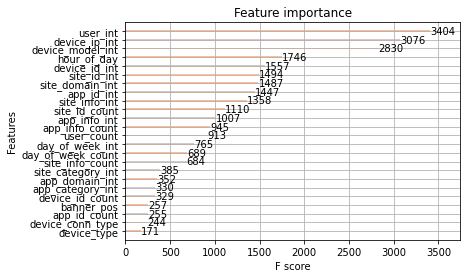

In [ ]:
plot_importance(models_nocat);

# LightGBM Model 

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
clf_lgbm = LGBMClassifier(n_estimators=500)
RESULTS["lgbm_500"] = evaluate_model(clf_lgbm)

In [ ]:
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273
xgboost_1000,473.557321,2.290347,0.404574,0.338092
lgbm_500,32.254790,13.387838,0.399409,0.386806


In [ ]:
clf_lgbm = LGBMClassifier(n_estimators=1000)
RESULTS["lgbm_1000"] = evaluate_model(clf_lgbm)

In [ ]:
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273
xgboost_1000,473.557321,2.290347,0.404574,0.338092
lgbm_500,32.254790,13.387838,0.399409,0.386806
lgbm_1000,55.279523,22.228135,0.398956,0.374431


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
RESULTS["tree"] = evaluate_model(DecisionTreeClassifier())

In [ ]:
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273
xgboost_1000,473.557321,2.290347,0.404574,0.338092
lgbm_500,32.254790,13.387838,0.399409,0.386806
lgbm_1000,55.279523,22.228135,0.398956,0.374431
tree,15.684129,0.360458,8.661895,0.006416


This was a very basic model, just wanted to see how it is. 

## Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
#estimator_bagging_100 = BaggingClassifier(n_estimators=100)
#RESULTS["bagging_tree_100"] = evaluate_model(estimator_bagging_100)
#display_results(RESULTS)

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimator_randomforest = RandomForestClassifier(n_estimators=100)

RESULTS["randomforest_100"] = evaluate_model(estimator_randomforest)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273
xgboost_1000,473.557321,2.290347,0.404574,0.338092
lgbm_500,32.254790,13.387838,0.399409,0.386806
lgbm_1000,55.279523,22.228135,0.398956,0.374431
tree,15.684129,0.360458,8.661895,0.006416
randomforest_100,303.747663,20.253636,0.485425,0.107389


## Stacking 

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
estimator_stacking = StackingClassifier(
    classifiers=[
        BaggingClassifier(n_estimators=100),
        AdaBoostClassifier(n_estimators=100),
        RandomForestClassifier(n_estimators=100)
    ], meta_classifier = RandomForestClassifier())

In [ ]:
RESULTS["stacking"]  = evaluate_model(estimator_stacking)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
xgboost_500,241.216323,1.325785,0.400906,0.362273
xgboost_1000,473.557321,2.290347,0.404574,0.338092
lgbm_500,32.254790,13.387838,0.399409,0.386806
lgbm_1000,55.279523,22.228135,0.398956,0.374431
tree,15.684129,0.360458,8.661895,0.006416
randomforest_100,303.747663,20.253636,0.485425,0.107389
stacking,1238.393251,37.238408,0.969867,0.022757


## Using 5 million Data Points and log standardization

In [ ]:
training5 = training.sample(n = 5000000, axis = 0)

In [ ]:
training5

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,hour_of_day,day_of_week,user,site_info,app_info
13333312,0,1005,1,88154ade,9f448720,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,1800,3,167,100075,23,12,Friday,a99f214a6b80b0398a4875bd,88154ade9f4487203e814130,ecad23867801e8d907d7df22
27780523,0,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2639,2,35,-1,23,18,Tuesday,a99f214a8474dd5aa0f5f879,e151e2457e091613f028772b,ecad23867801e8d907d7df22
4233000,1,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,20008962,...,178,3,1327,-1,15,5,Wednesday,20008962284934771f0bc64f,85f751fdc4e18dd650e219e0,7358e05eb9528b13cef3e649
6693335,1,1005,0,5bcf81a2,9d54950b,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2507,0,35,100176,157,13,Wednesday,a99f214ab7b100e5ef726eae,5bcf81a29d54950bf028772b,ecad23867801e8d907d7df22
16950091,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,17,Saturday,a99f214a1f4dc433c6263d8a,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24155137,0,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,...,2480,3,297,100111,61,2,Tuesday,a99f214a3b85de44aad45b01,85f751fdc4e18dd650e219e0,febd113882e279960f2161f8
19050613,0,1005,1,f0ee33c5,9cf7de2f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1800,3,167,100079,23,10,Sunday,a99f214ad804394dc6263d8a,f0ee33c59cf7de2ff028772b,ecad23867801e8d907d7df22
20928622,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,100083,79,21,Sunday,a99f214ad2b32c8478d9bd10,1fbe01fef384576728905ebd,ecad23867801e8d907d7df22
16321225,0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1882,3,35,-1,13,14,Saturday,a99f214a3022fbc3fce66524,856e6d3f58a89a43f028772b,ecad23867801e8d907d7df22


In [ ]:
training5.dtypes

click                int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
hour_of_day          int64
day_of_week         object
user                object
site_info           object
app_info            object
dtype: object

In [ ]:
fl = ['device_id', 'site_id', "user", "site_info", "app_info", "app_id", "day_of_week", "device_model", "device_ip", "app_domain"] 
for flf in fl:
  training5[flf + '_mean'] = training5.groupby(
    flf)['click'].transform("mean")

In [ ]:
f2 = ['device_id', 'site_id', "user", "site_info", "app_info", "app_id", "day_of_week", "device_model", "device_ip", "app_domain"] 
for f22 in f2:
  training5[f22 + '_count'] = training5.groupby(
    f22)['click'].transform("count")

In [ ]:
training5.dtypes

click                   int64
C1                      int64
banner_pos              int64
site_id                object
site_domain            object
site_category          object
app_id                 object
app_domain             object
app_category           object
device_id              object
device_ip              object
device_model           object
device_type             int64
device_conn_type        int64
C14                     int64
C15                     int64
C16                     int64
C17                     int64
C18                     int64
C19                     int64
C20                     int64
C21                     int64
hour_of_day             int64
day_of_week            object
user                   object
site_info              object
app_info               object
device_id_mean        float64
site_id_mean          float64
user_mean             float64
site_info_mean        float64
app_info_mean         float64
app_id_mean           float64
day_of_wee

## Running the top performing models with a larger dataset + counts and means 

In [ ]:
ft5 = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int', 'user_int', 'site_info_int', 'app_info_int',"device_id_count", "site_id_count", "user_count", "site_info_count", "app_info_count", "app_id_count", "day_of_week_count", "device_model_count", "device_ip_count", "app_domain_count",
             "device_id_mean", "site_id_mean",          "user_mean",         
"site_info_mean",        
"app_info_mean",   
"app_id_mean",            
"day_of_week_mean",      
"device_model_mean",   
"device_ip_mean",       
"app_domain_mean"] 

In [ ]:
t5h = convert_obj_to_int(training5)

In [ ]:
t5h.dtypes

click                   int64
C1                      int64
banner_pos              int64
device_type             int64
device_conn_type        int64
C14                     int64
C15                     int64
C16                     int64
C17                     int64
C18                     int64
C19                     int64
C20                     int64
C21                     int64
hour_of_day             int64
device_id_mean        float64
site_id_mean          float64
user_mean             float64
site_info_mean        float64
app_info_mean         float64
app_id_mean           float64
day_of_week_mean      float64
device_model_mean     float64
device_ip_mean        float64
app_domain_mean       float64
device_id_count         int64
site_id_count           int64
user_count              int64
site_info_count         int64
app_info_count          int64
app_id_count            int64
day_of_week_count       int64
device_model_count      int64
device_ip_count         int64
app_domain

In [ ]:
xt5 = t5h.loc[:, ft5]
yt5 = t5h.click.values

In [ ]:
def evaluate_model2(estimator):
    return cross_validate(estimator,                     
                    X=xt5,
                    y=yt5,
                    scoring="neg_log_loss",
                    n_jobs=-1, cv=5,
                    return_train_score=True)

def display_results2(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df

Training5_Results= {}

def evaluate_model2(estimator):
    cv_results = cross_validate(estimator,
                    X=xt5,
                    y=yt5,
                    scoring="neg_log_loss",
                          n_jobs=-1, cv=10,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [ ]:
estimator_xgboost_t5 = XGBClassifier(n_estimators=1000)

Training5_Results["t5_xgb"] = evaluate_model2(estimator_xgboost_t5)

display_results(Training5_Results)